In [1]:
import tensorflow as tf
import os

In [2]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout

In [3]:
classifier = Sequential()

classifier.add(Conv2D(filters = 128, kernel_size = (3, 3), activation = 'relu', input_shape = (40, 40, 3)))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.5))

classifier.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
classifier.add(MaxPooling2D(pool_size = (2, 2)))
classifier.add(Dropout(.5))

classifier.add(Flatten())

classifier.add(Dense(units = 128, activation = 'relu'))
classifier.add(Dropout(.5))

classifier.add(Dense(units = 50, activation = 'softmax'))

classifier.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])

In [4]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 38, 38, 128)       3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 19, 19, 128)      0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 19, 19, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 17, 17, 64)        73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 64)         0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 8, 8, 64)          0

In [5]:
from keras.preprocessing.image import ImageDataGenerator
from PIL import ImageFile

In [6]:
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_datagen = ImageDataGenerator(rescale = 1./255, shear_range = .2, rotation_range = 25)
test_datagen = ImageDataGenerator(rescale = 1./255)

training_set = train_datagen.flow_from_directory('Dataset/Train', target_size = (40, 40), 
                                                 batch_size = 30, class_mode = 'categorical')
test_set = test_datagen.flow_from_directory('Dataset/Test', target_size = (40, 40), 
                                                 batch_size = 30, class_mode = 'categorical')

Found 12000 images belonging to 50 classes.
Found 3000 images belonging to 50 classes.


In [7]:
tf_callback = tf.keras.callbacks.TensorBoard(log_dir='logs')

In [11]:
logs = classifier.fit(training_set, epochs = 300,
                         validation_data = test_set, validation_steps = 100, callbacks=[tf_callback])

Epoch 1/300
400/400 [==============================] - 20s 49ms/step - loss: 1.4824 - accuracy: 0.5651 - val_loss: 0.7045 - val_accuracy: 0.7903
Epoch 2/300
400/400 [==============================] - 22s 54ms/step - loss: 1.4093 - accuracy: 0.5794 - val_loss: 0.6823 - val_accuracy: 0.7997
Epoch 3/300
400/400 [==============================] - 22s 55ms/step - loss: 1.3388 - accuracy: 0.6018 - val_loss: 0.6478 - val_accuracy: 0.8060
Epoch 4/300
400/400 [==============================] - 23s 57ms/step - loss: 1.2847 - accuracy: 0.6152 - val_loss: 0.6136 - val_accuracy: 0.8137
Epoch 5/300
400/400 [==============================] - 23s 58ms/step - loss: 1.2627 - accuracy: 0.6227 - val_loss: 0.5703 - val_accuracy: 0.8390
Epoch 6/300
400/400 [==============================] - 24s 60ms/step - loss: 1.2251 - accuracy: 0.6274 - val_loss: 0.5342 - val_accuracy: 0.8410
Epoch 7/300
400/400 [==============================] - 25s 63ms/step - loss: 1.2056 - accuracy: 0.6323 - val_loss: 0.5348 - val_ac

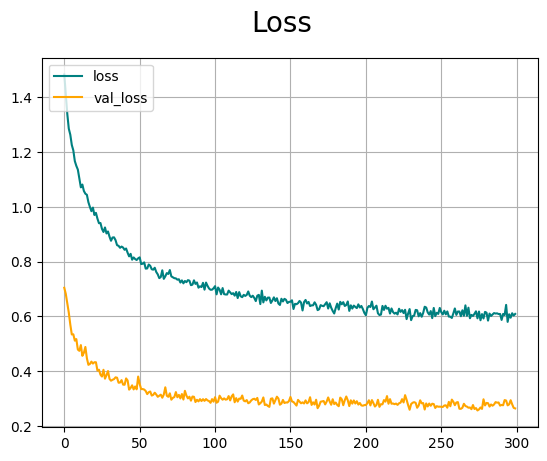

<Figure size 640x480 with 0 Axes>

In [12]:
from matplotlib import pyplot as plt

fig = plt.figure()
plt.plot(logs.history['loss'], color='teal', label='loss')
plt.plot(logs.history['val_loss'], color='orange', label='val_loss')
plt.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.grid()
plt.show()

plt.savefig("Loss_CNN.jpg")

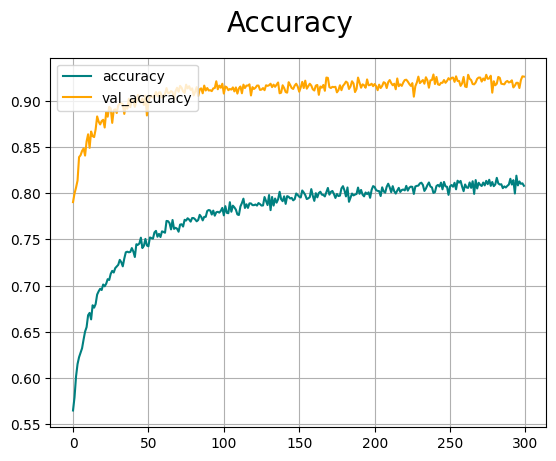

<Figure size 640x480 with 0 Axes>

In [16]:
fig = plt.figure()
plt.plot(logs.history['accuracy'], color='teal', label='accuracy')
plt.plot(logs.history['val_accuracy'], color='orange', label='val_accuracy')
plt.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.grid()
plt.show()

plt.savefig("Accuracy_CNN.jpg")

In [14]:
from tensorflow.keras.models import load_model

In [15]:
classifier.save(os.path.join('models','cnnB3.h5'))